# Install all

In [47]:
#!pip install seaborn
#!pip install pandas_datareader
#!  pip install keras


# Import

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_datareader as web


In [49]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [50]:
url = 'https://raw.githubusercontent.com/Aabishkar2/nepse-data/refs/heads/main/data/company-wise/ADBL.csv'
data = pd.read_csv(url)
selected_data = data[['published_date', 'close']]
selected_data.head()



,published_date,close
0,2010-09-16,120.0
1,2010-09-19,118.0
2,2010-09-20,118.0
3,2010-09-21,116.0
4,2010-09-23,120.0


In [51]:
print('There are {} number of days in the dataset.'.format(selected_data.shape[0]))

There are 3222 number of days in the dataset.


Plotting the graph


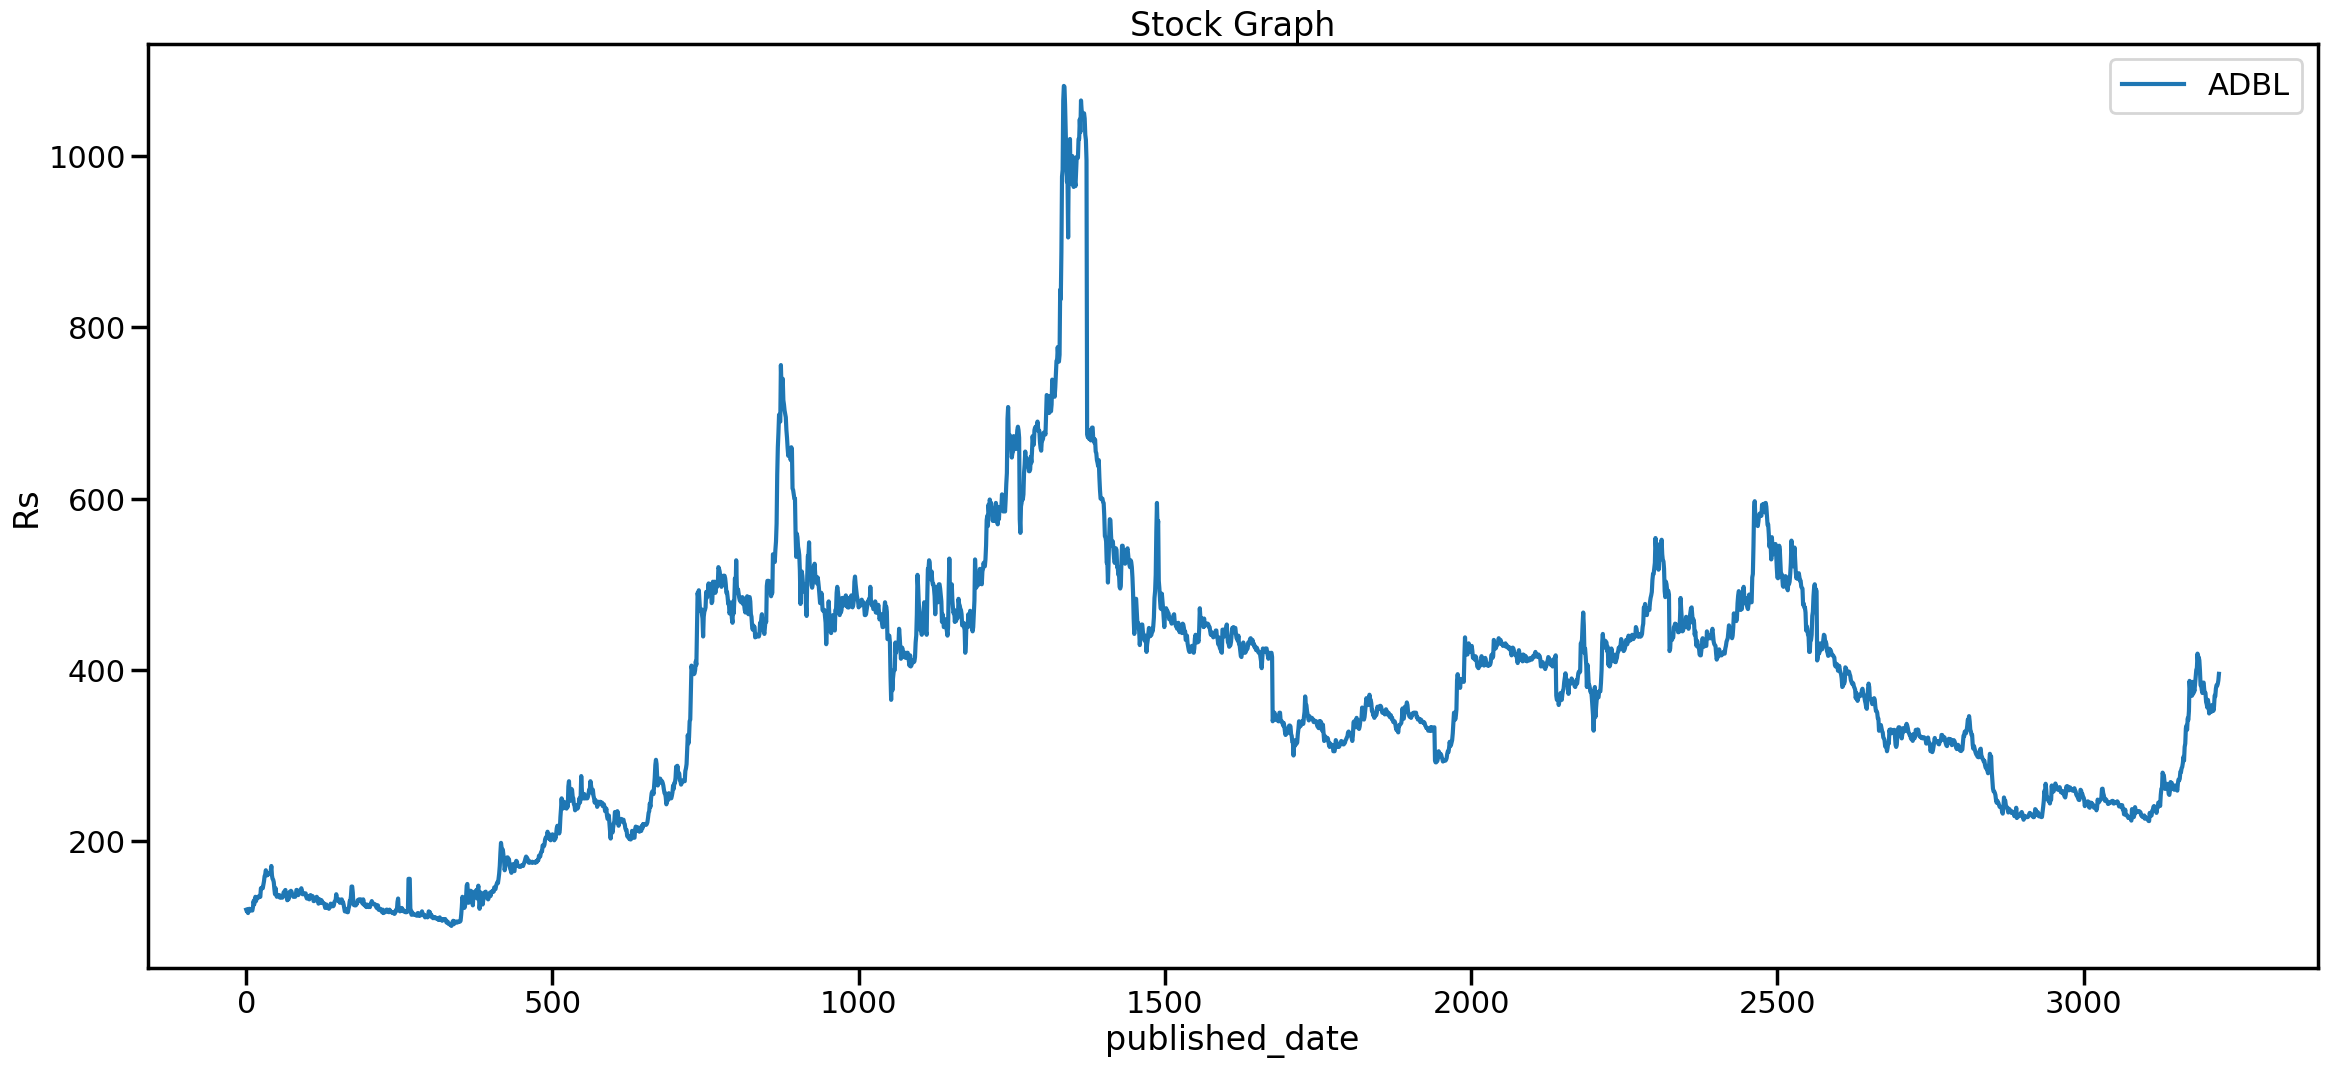

In [52]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(selected_data.index, data['close'], label='ADBL')
plt.xlabel('published_date')
plt.ylabel('Rs')
plt.title('Stock Graph')
plt.legend()
plt.show()

# Logic For Technical  Analysis

Moving averages (7 and 21 dayss)
MACD
Bolinger Bands
EMA
Momentum

In [53]:


def technical_analysis(dataset):
    # Moving Average of 7 and 21 days
    dataset.loc[:, 'ma7'] = dataset['close'].rolling(window=7).mean()
    dataset.loc[:, 'ma21'] = dataset['close'].rolling(window=21).mean()

    # Create MACD
    dataset.loc[:, '26ema'] = dataset['close'].ewm(span=26).mean()
    dataset.loc[:, '12ema'] = dataset['close'].ewm(span=12).mean()
    dataset.loc[:, 'MACD'] = dataset['12ema'] - dataset['26ema']

    # Create Bollinger Bands
    dataset.loc[:, '20sd'] = dataset['close'].rolling(window=21).std()
    dataset.loc[:, 'upper_band'] = dataset['ma21'] + (dataset['20sd'] * 2)
    dataset.loc[:, 'lower_band'] = dataset['ma21'] - (dataset['20sd'] * 2)

    # Create Exponential moving average
    dataset.loc[:, 'ema'] = dataset['close'].ewm(com=0.5).mean()

    # Create Momentum
    dataset.loc[:, 'momentum'] = dataset['close'] - 1
    dataset.loc[:, 'log_momentum'] = np.log(dataset['momentum'])

    return dataset


In [54]:
df=technical_analysis(selected_data)

C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_27192\880002497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'ma7'] = dataset['close'].rolling(window=7).mean()
C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_27192\880002497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'ma21'] = dataset['close'].rolling(window=21).mean()
C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_27192\880002497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [55]:
df

,published_date,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,2010-09-16,120.0,NaN,NaN,120.000000,120.000000,0.000000,NaN,NaN,NaN,120.000000,119.0,4.779123
1,2010-09-19,118.0,NaN,NaN,118.961538,118.916667,-0.044872,NaN,NaN,NaN,118.500000,117.0,4.762174
2,2010-09-20,118.0,NaN,NaN,118.616067,118.558891,-0.057176,NaN,NaN,NaN,118.153846,117.0,4.762174
3,2010-09-21,116.0,NaN,NaN,117.884729,117.751149,-0.133580,NaN,NaN,NaN,116.700000,115.0,4.744932
4,2010-09-23,120.0,NaN,NaN,118.375269,118.362154,-0.013115,NaN,NaN,NaN,118.909091,119.0,4.779123
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,2024-10-07,382.0,366.557143,362.585714,365.912729,366.772662,0.859934,9.729763,382.045240,343.126189,379.536781,381.0,5.942799
3218,2024-10-08,381.4,370.042857,362.804762,367.059934,369.023022,1.963088,10.110118,383.024997,342.584527,380.778927,380.4,5.941223
3219,2024-10-09,383.5,374.500000,363.304762,368.277717,371.250249,2.972533,10.870578,385.045919,341.563605,382.592976,382.5,5.946729
3220,2024-10-15,387.5,378.785714,363.995238,369.701590,373.750211,4.048621,11.926419,387.848077,340.142400,385.864325,386.5,5.957132


In [56]:
df = df.dropna()
df.rows = df.iloc[0]
df

# Drop the first row after setting it as the header
df = df.set_index('published_date')

print(df)
df.head()

                close         ma7        ma21       26ema       12ema  \
published_date                                                          
2010-10-24      134.0  133.142857  124.714286  127.495172  130.136465   
2010-10-25      136.0  133.714286  125.476190  128.267159  131.062005   
2010-10-26      135.0  133.714286  126.285714  128.868266  131.681128   
2010-10-27      135.0  134.428571  127.095238  129.407506  132.201160   
2010-10-28      145.0  136.142857  128.476190  130.759993  134.200918   
...               ...         ...         ...         ...         ...   
2024-10-07      382.0  366.557143  362.585714  365.912729  366.772662   
2024-10-08      381.4  370.042857  362.804762  367.059934  369.023022   
2024-10-09      383.5  374.500000  363.304762  368.277717  371.250249   
2024-10-15      387.5  378.785714  363.995238  369.701590  373.750211   
2024-10-16      395.4  382.400000  365.557143  371.605175  377.080948   

                    MACD       20sd  upper_band  l

C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_27192\610484397.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.rows = df.iloc[0]


,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2010-10-24,134.0,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,136.0,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,135.0,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,145.0,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813


# Plotting these analysis

In [57]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('NPR')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

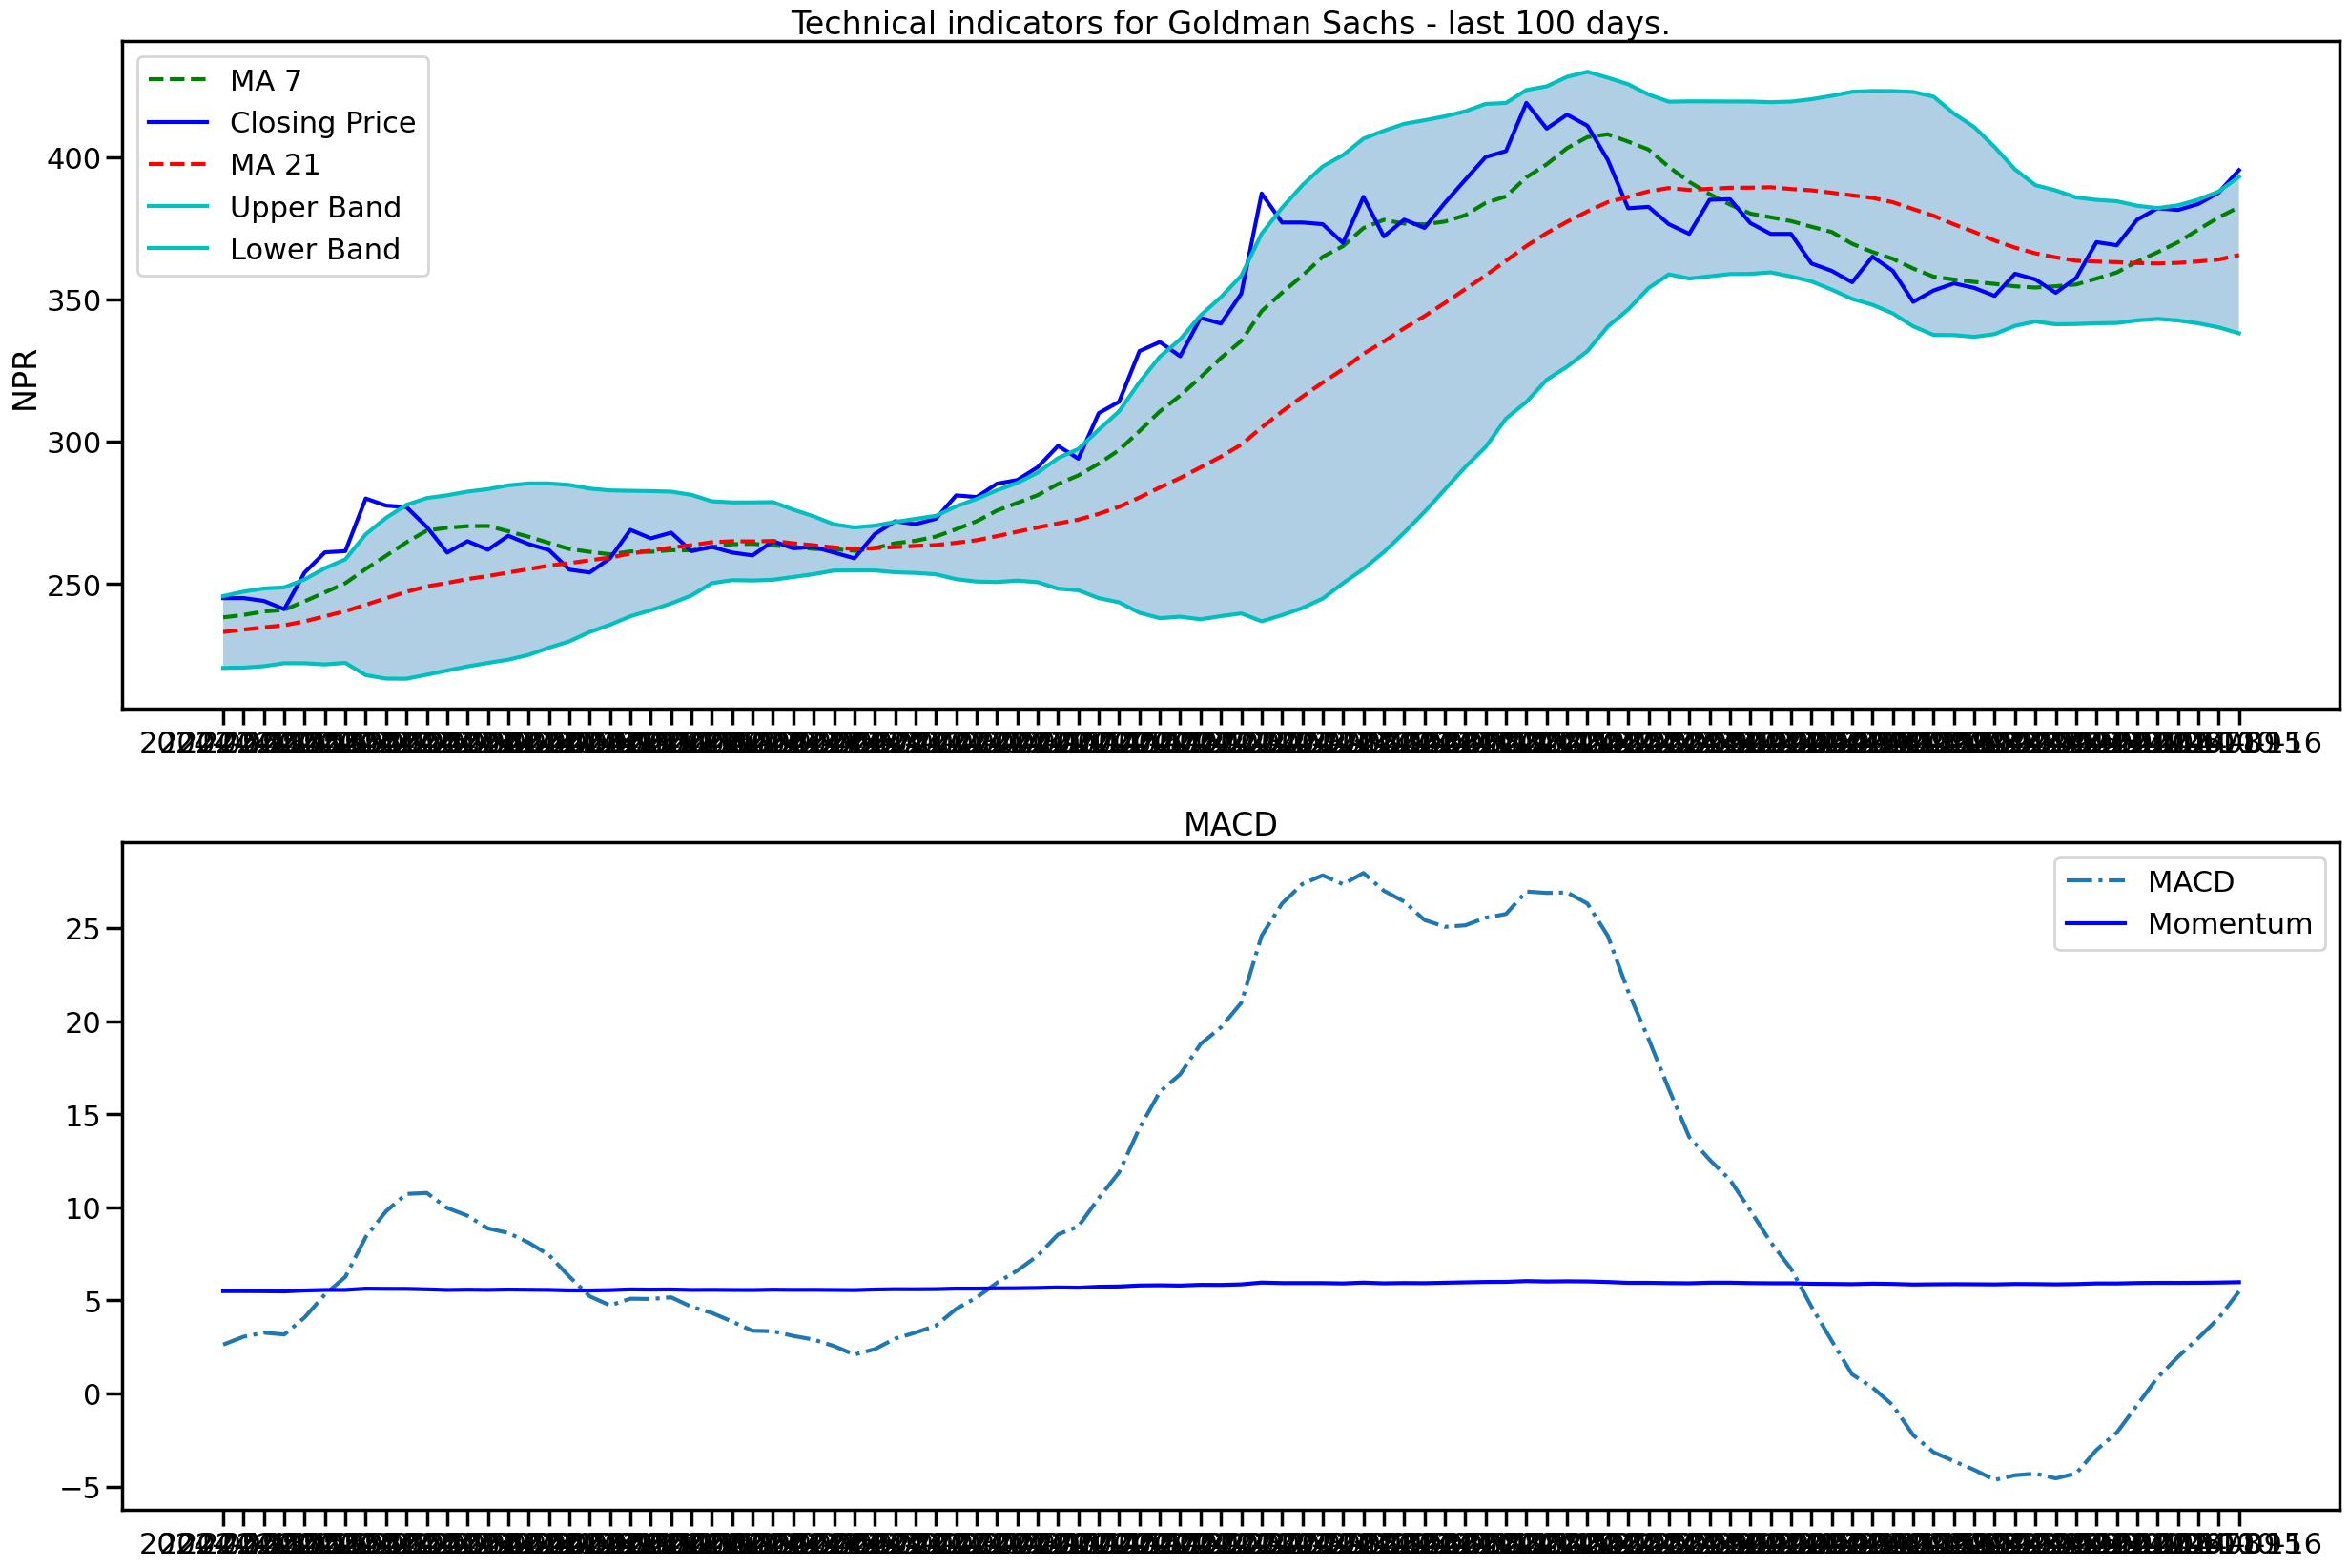

In [58]:
plot_technical_indicators(df, 100)

In [59]:
df

,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2010-10-24,134.0,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,136.0,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,135.0,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,145.0,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,382.0,366.557143,362.585714,365.912729,366.772662,0.859934,9.729763,382.045240,343.126189,379.536781,381.0,5.942799
2024-10-08,381.4,370.042857,362.804762,367.059934,369.023022,1.963088,10.110118,383.024997,342.584527,380.778927,380.4,5.941223
2024-10-09,383.5,374.500000,363.304762,368.277717,371.250249,2.972533,10.870578,385.045919,341.563605,382.592976,382.5,5.946729


Text(0.5, 1.0, 'Params')

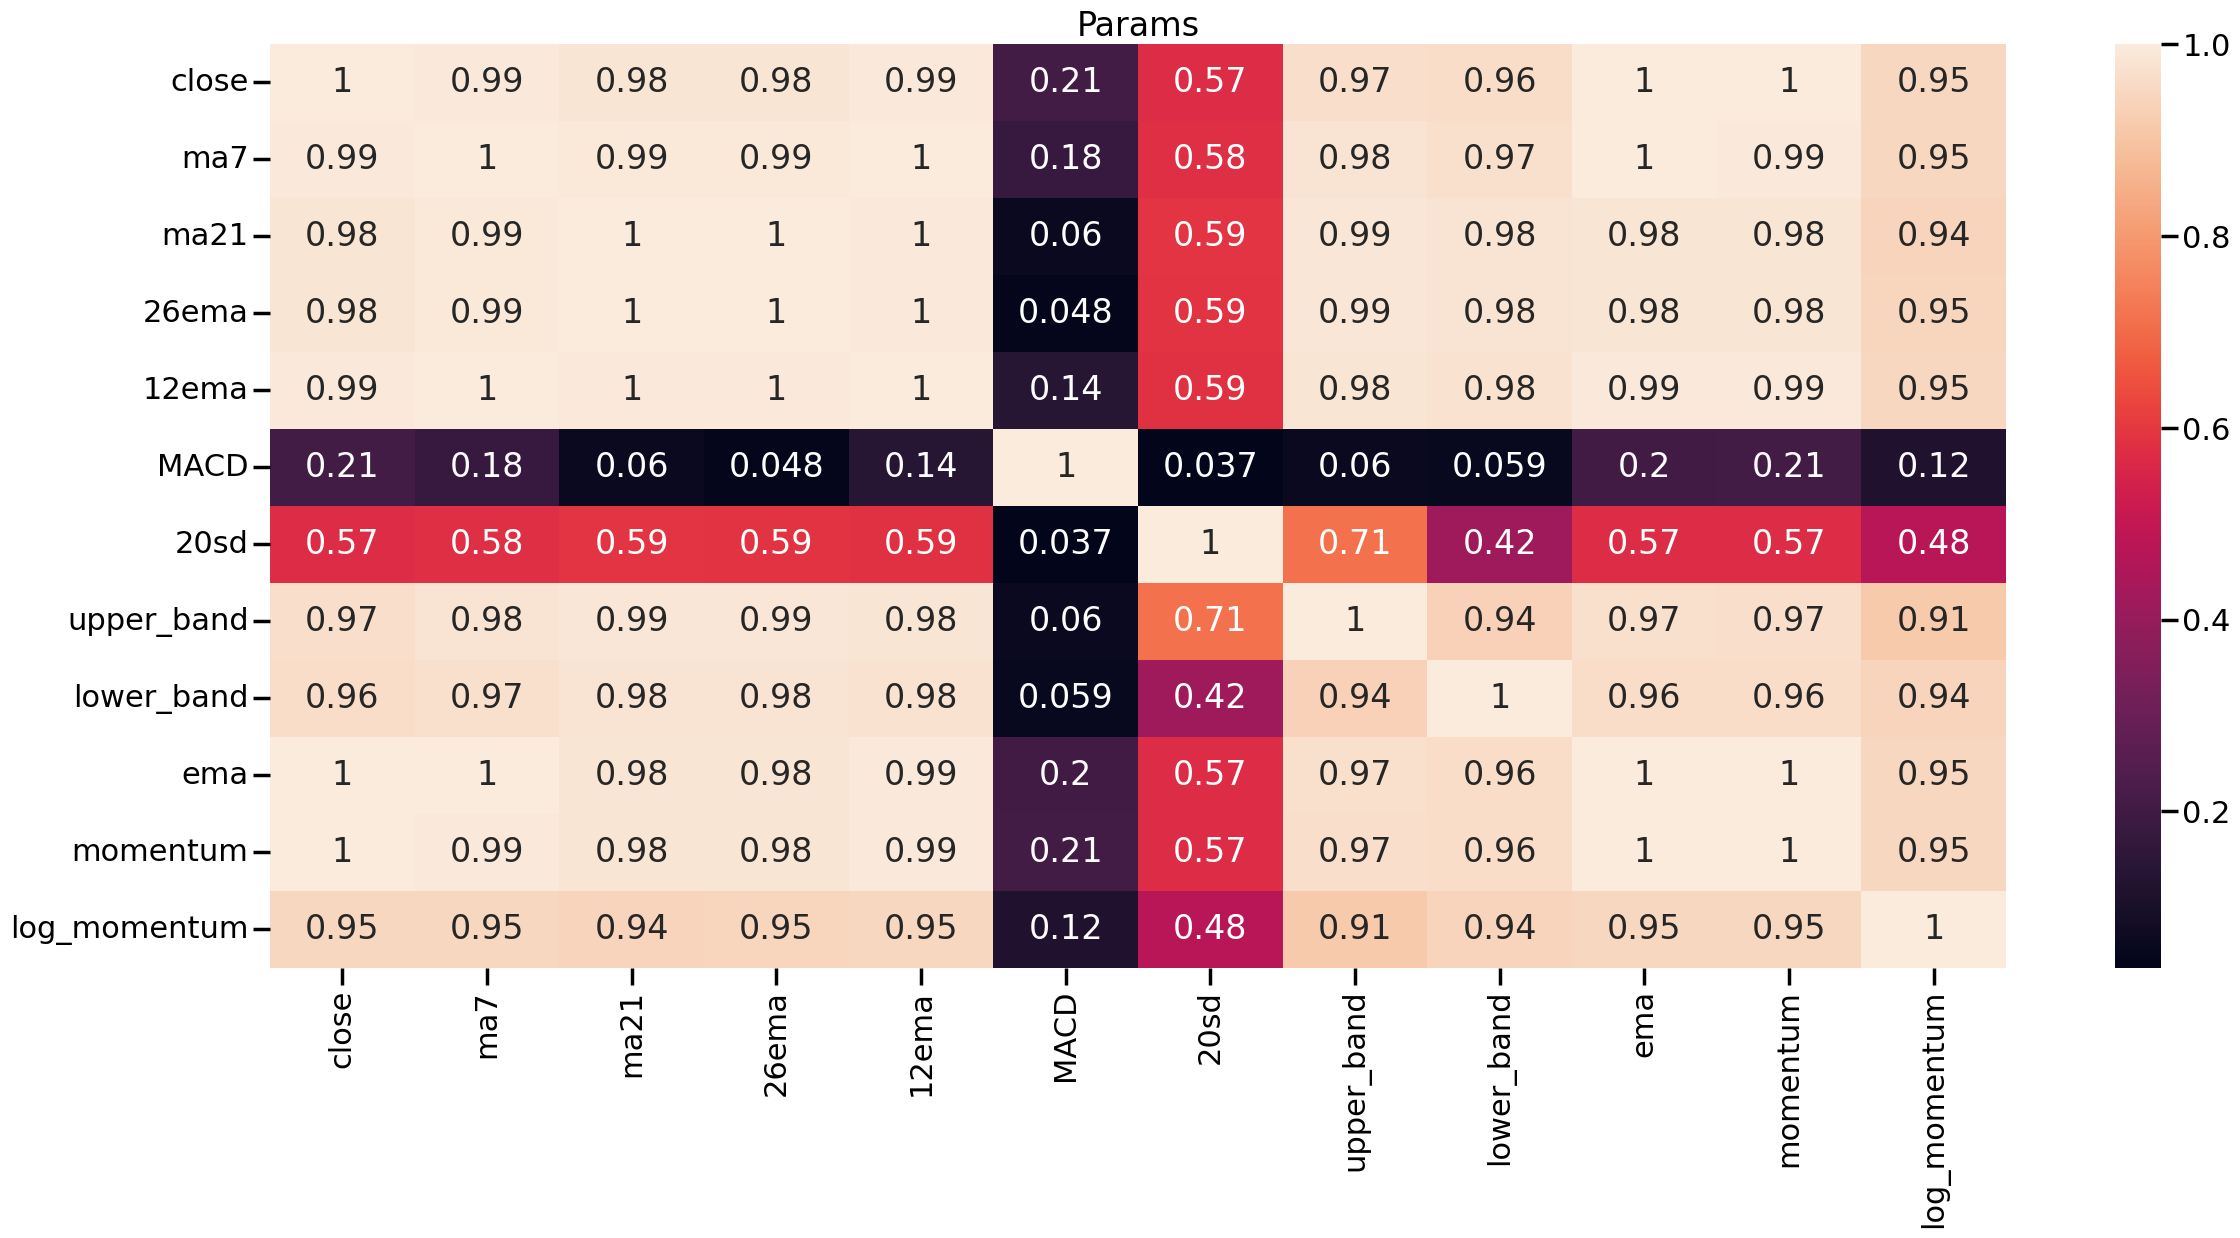

In [60]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')

In [61]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 3202 samples, and 12 features.


In [62]:
df.columns

Index(['close', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum'],
      dtype='object')

In [63]:
df

,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2010-10-24,134.0,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,136.0,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,135.0,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,145.0,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,382.0,366.557143,362.585714,365.912729,366.772662,0.859934,9.729763,382.045240,343.126189,379.536781,381.0,5.942799
2024-10-08,381.4,370.042857,362.804762,367.059934,369.023022,1.963088,10.110118,383.024997,342.584527,380.778927,380.4,5.941223
2024-10-09,383.5,374.500000,363.304762,368.277717,371.250249,2.972533,10.870578,385.045919,341.563605,382.592976,382.5,5.946729


In [64]:
data_training = df[df.index < '2019-01-31'].copy()
data_training

,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2010-10-24,134.0,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
2010-10-25,136.0,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
2010-10-26,135.0,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
2010-10-27,135.0,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
2010-10-28,145.0,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-24,342.0,344.285714,347.190476,346.143373,345.236804,-0.906569,3.982701,355.155878,339.225075,342.340147,341.0,5.831882
2019-01-27,339.0,342.714286,346.238095,345.614234,344.277296,-1.336938,3.360130,352.958356,339.517834,340.113382,338.0,5.823046
2019-01-28,342.0,342.285714,345.809524,345.346513,343.926942,-1.419570,3.295740,352.401005,339.218043,341.371127,341.0,5.831882


In [65]:
data_testing = df[df.index >= '2019-01-31'].copy()
data_testing

,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
published_date,,,,,,,,,,,,
2019-01-31,339.0,340.714286,344.809524,344.165080,342.205171,-1.959909,3.880967,352.571458,337.047590,339.235968,338.0,5.823046
2019-02-03,338.0,340.000000,344.476190,343.708407,341.558222,-2.150186,4.154745,352.785680,336.166701,338.411989,337.0,5.820083
2019-02-04,339.0,339.571429,344.238095,343.359636,341.164649,-2.194987,4.323248,352.884592,335.591599,338.803996,338.0,5.823046
2019-02-05,338.0,339.428571,343.857143,342.962626,340.677780,-2.284846,4.508722,352.874586,334.839699,338.267999,337.0,5.820083
2019-02-06,335.0,338.428571,343.190476,342.372802,339.804275,-2.568527,4.739399,352.669275,333.711678,336.089333,334.0,5.811141
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,382.0,366.557143,362.585714,365.912729,366.772662,0.859934,9.729763,382.045240,343.126189,379.536781,381.0,5.942799
2024-10-08,381.4,370.042857,362.804762,367.059934,369.023022,1.963088,10.110118,383.024997,342.584527,380.778927,380.4,5.941223
2024-10-09,383.5,374.500000,363.304762,368.277717,371.250249,2.972533,10.870578,385.045919,341.563605,382.592976,382.5,5.946729


In [66]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(1901, 12)


array([[0.03363914, 0.03191329, 0.02192823, ..., 0.0333404 , 0.03363914,
        0.11979934],
       [0.03567788, 0.03251543, 0.0227616 , ..., 0.03474986, 0.03567788,
        0.12606938],
       [0.03465851, 0.03251543, 0.02364706, ..., 0.03453553, 0.03465851,
        0.12294606],
       ...,
       [0.24566769, 0.25229565, 0.26376374, ..., 0.24621053, 0.24566769,
        0.51532321],
       [0.24464832, 0.25169351, 0.26334705, ..., 0.24595662, 0.24464832,
        0.51408948],
       [0.24260958, 0.25124191, 0.26298245, ..., 0.2445037 , 0.24260958,
        0.5116111 ]])

In [67]:
X_train = []
y_train = []

In [68]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [69]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((1841, 60, 12), (1841,))

In [70]:
regressor = Sequential()    #Sequential   because we are predicting the stock market price.....

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 12)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

C:\Users\L E G I O N\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,961 (706.88 KB)

 Trainable params: 180,961 (706.88 KB)

 Non-trainable params: 0 (0.00 B)